# **Cancer Diagnosis with Machine Learning**

This notebook demonstrates a complete machine learning workflow
for cancer diagnosis. It covers data cleaning, label encoding,
visualization, and model training. The performance of Random Forest
and Logistic Regression is compared using accuracy, precision, recall,
and F1-score, along with visual confusion matrix and bar plot comparisons.

**Goal**:
To evaluate and compare machine learning models
for reliable and interpretable cancer diagnosis.

**Author**: Asif Amir Noor

## Load and view data

In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
df = pd.read_csv("/content/drive/MyDrive/CSE303/Project/The_Cancer_data_1500_V3.csv")

<Axes: >

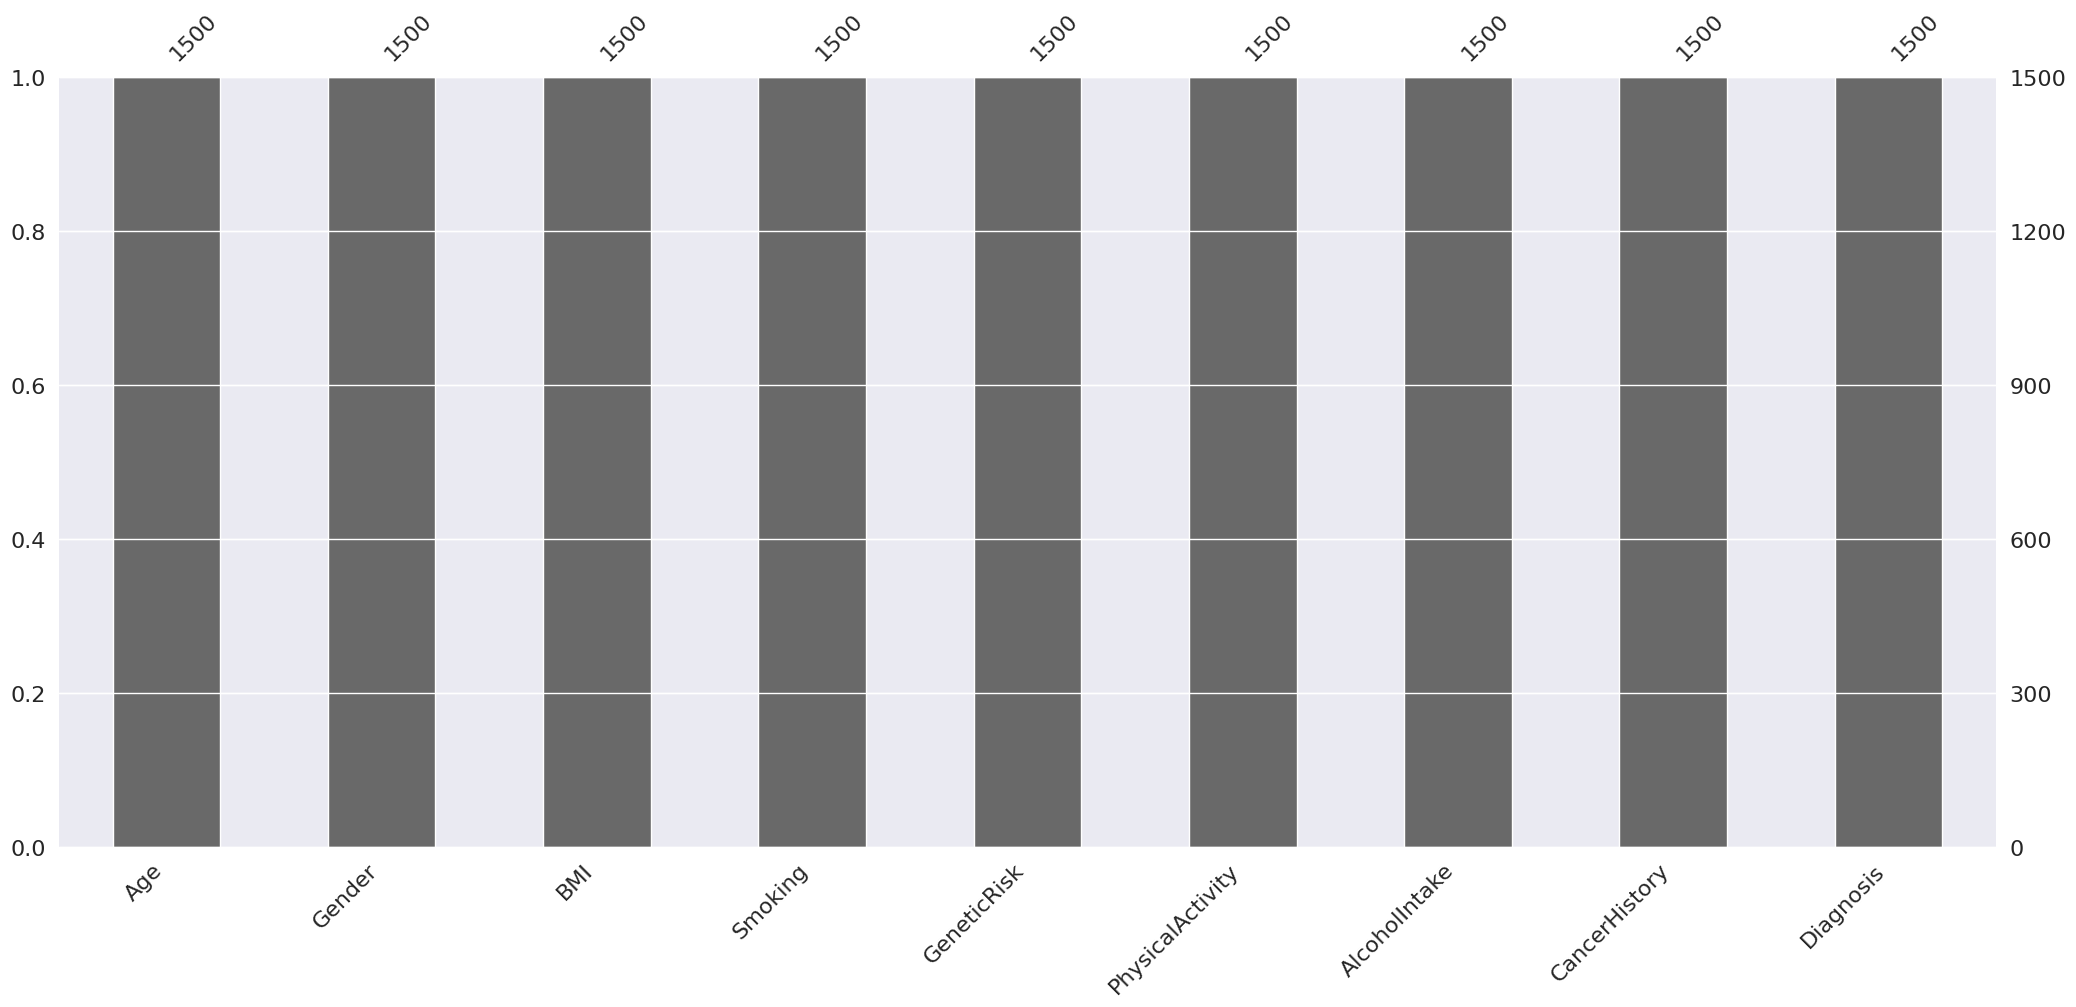

In [243]:
import missingno as msno
msno.bar(df)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   object 
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   object 
 4   GeneticRisk       1500 non-null   object 
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   object 
 8   Diagnosis         1500 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 105.6+ KB


## Data Cleaning

In [245]:
df_cat=df.copy()

In [246]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   object 
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   object 
 4   GeneticRisk       1500 non-null   object 
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   object 
 8   Diagnosis         1500 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 105.6+ KB


In [247]:
# finding duplicate data
duplicate = df_cat[df_cat.duplicated()]
duplicate

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis


In [248]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               0 non-null      int64  
 1   Gender            0 non-null      object 
 2   BMI               0 non-null      float64
 3   Smoking           0 non-null      object 
 4   GeneticRisk       0 non-null      object 
 5   PhysicalActivity  0 non-null      float64
 6   AlcoholIntake     0 non-null      float64
 7   CancerHistory     0 non-null      object 
 8   Diagnosis         0 non-null      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 0.0+ bytes


In [249]:
# finding null data
df_cat.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


<Axes: >

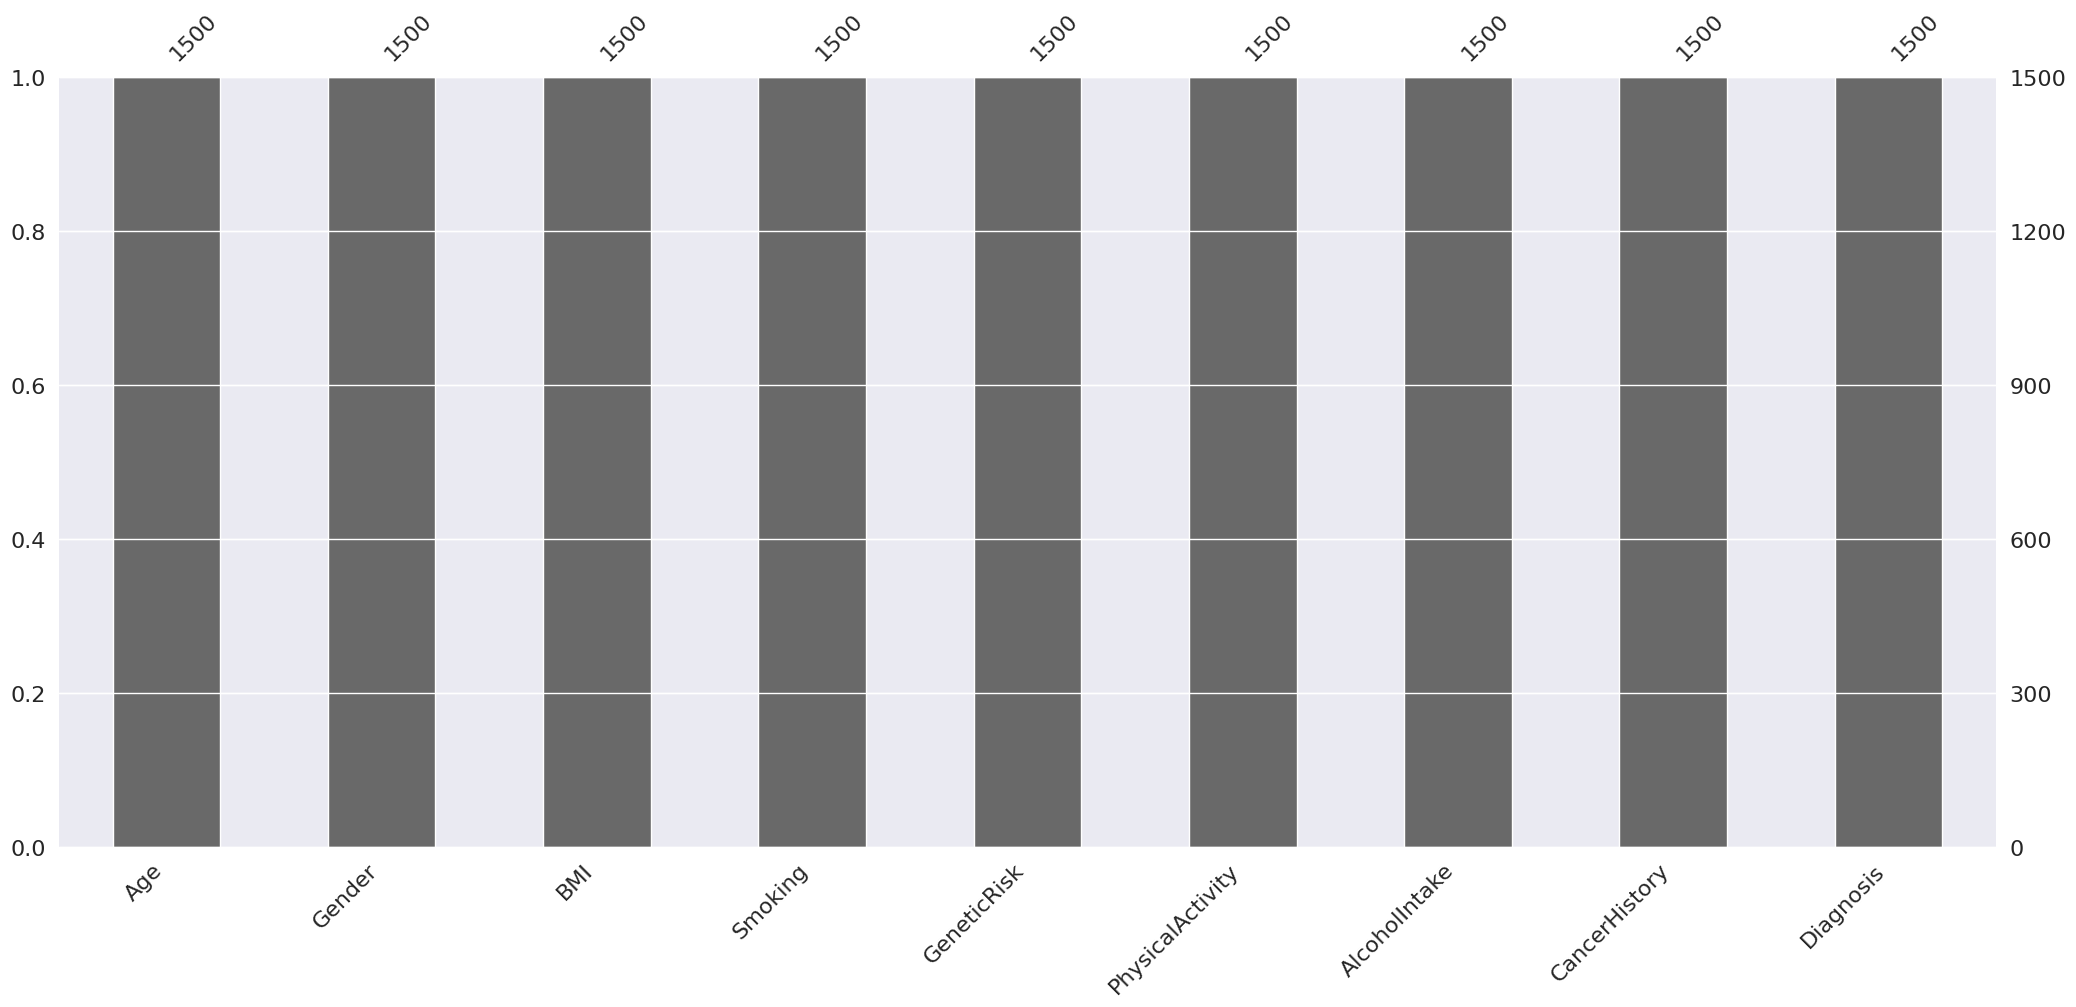

In [250]:
import missingno as msno
msno.bar(df_cat)

In [251]:
df_cat.describe()

,Age,BMI,PhysicalActivity,AlcoholIntake
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,27.513321,4.897929,2.417987
std,17.640968,7.230012,2.866162,1.419318
min,20.000000,15.000291,0.002410,0.001215
25%,35.000000,21.483134,2.434609,1.210598
50%,51.000000,27.598494,4.834316,2.382971
75%,66.000000,33.850837,7.409896,3.585624
max,80.000000,39.958688,9.994607,4.987115


## Label Encoding

In [252]:
df_copy=df.copy()
df_copy.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,Female,16.085313,No,Medium,8.146251,4.148219,Yes,Cancer
1,71,Male,30.828784,No,Medium,9.361630,3.519683,No,No Cancer
2,48,Female,38.785084,No,High,5.135179,4.728368,No,Cancer
3,34,Male,30.040296,No,Low,9.502792,2.044636,No,No Cancer
4,62,Female,35.479721,No,Low,5.356890,3.309849,No,Cancer


In [253]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

for col in categorical_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

df_copy.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,0,16.085313,0,2,8.146251,4.148219,1,0
1,71,1,30.828784,0,2,9.361630,3.519683,0,1
2,48,0,38.785084,0,0,5.135179,4.728368,0,0
3,34,1,30.040296,0,1,9.502792,2.044636,0,1
4,62,0,35.479721,0,1,5.356890,3.309849,0,0


In [254]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


## Visualization

In [255]:
# Correlation table
correlation = df_copy.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,-0.007145,0.030246,-0.013914,-0.053254,0.016396,0.003209,-0.010996,-0.196603
Gender,-0.007145,1.000000,0.012516,-0.035384,-0.031286,-0.023401,-0.009723,-0.007657,0.250336
BMI,0.030246,0.012516,1.000000,-0.012616,-0.010991,0.011480,0.004711,-0.010824,-0.187560
Smoking,-0.013914,-0.035384,-0.012616,1.000000,-0.049263,-0.043817,-0.001660,0.016368,-0.226999
GeneticRisk,-0.053254,-0.031286,-0.010991,-0.049263,1.000000,-0.024900,-0.004257,0.032583,0.224167
PhysicalActivity,0.016396,-0.023401,0.011480,-0.043817,-0.024900,1.000000,0.033856,0.018136,0.150089
AlcoholIntake,0.003209,-0.009723,0.004711,-0.001660,-0.004257,0.033856,1.000000,0.055403,-0.212772
CancerHistory,-0.010996,-0.007657,-0.010824,0.016368,0.032583,0.018136,0.055403,1.000000,-0.392188
Diagnosis,-0.196603,0.250336,-0.187560,-0.226999,0.224167,0.150089,-0.212772,-0.392188,1.000000


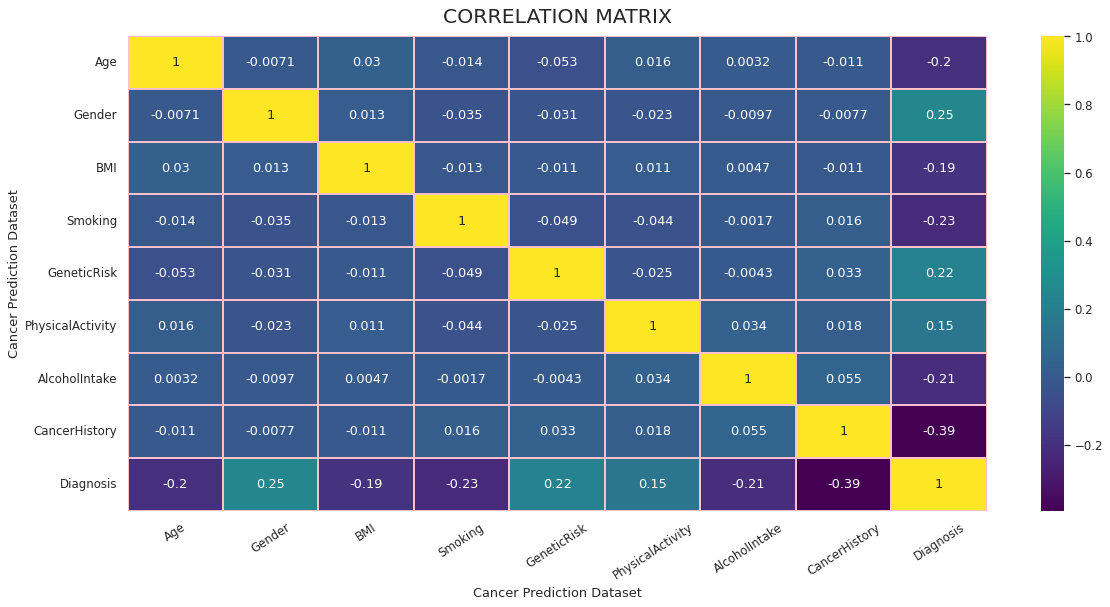

In [256]:
# Visualisation of the corralation table

plt.figure(figsize=(18,8), dpi=77)
sns.heatmap(correlation, linecolor='pink',linewidths=0.1, annot=True, cmap="viridis")
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Cancer Prediction Dataset')
plt.ylabel('Cancer Prediction Dataset')
plt.xticks(rotation=33)
plt.show()

<Axes: xlabel='Age'>

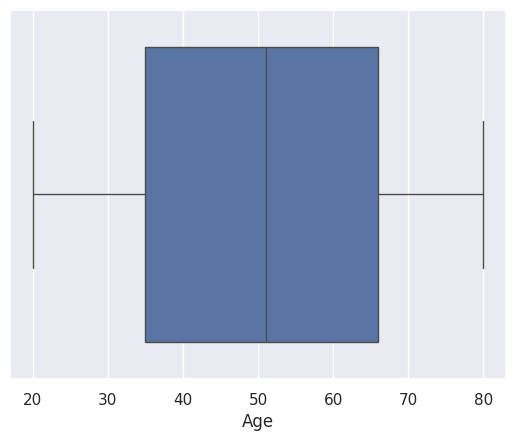

In [257]:
# Box plot of Age
# Represents IQR range of Age

sns.boxplot(x=df_copy['Age'])


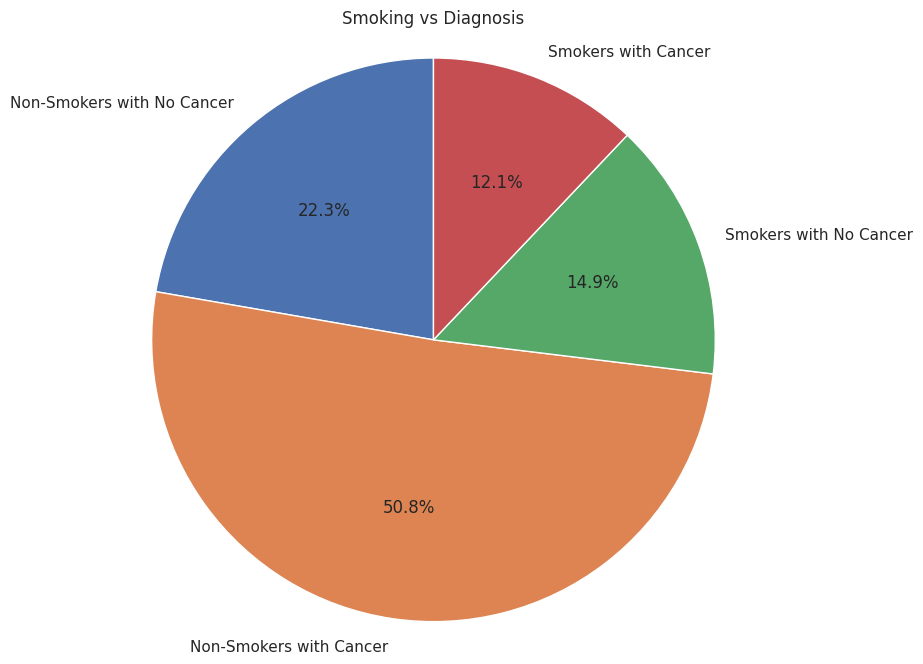

In [258]:
# Create a cross-tabulation of Smoking and Diagnosis
smoking_diagnosis_counts = pd.crosstab(df_cat['Smoking'], df_cat['Diagnosis'])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoking_diagnosis_counts.values.flatten(),
        labels=['Non-Smokers with No Cancer', 'Non-Smokers with Cancer',
                'Smokers with No Cancer', 'Smokers with Cancer'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Smoking vs Diagnosis')
plt.axis('equal')
plt.show()

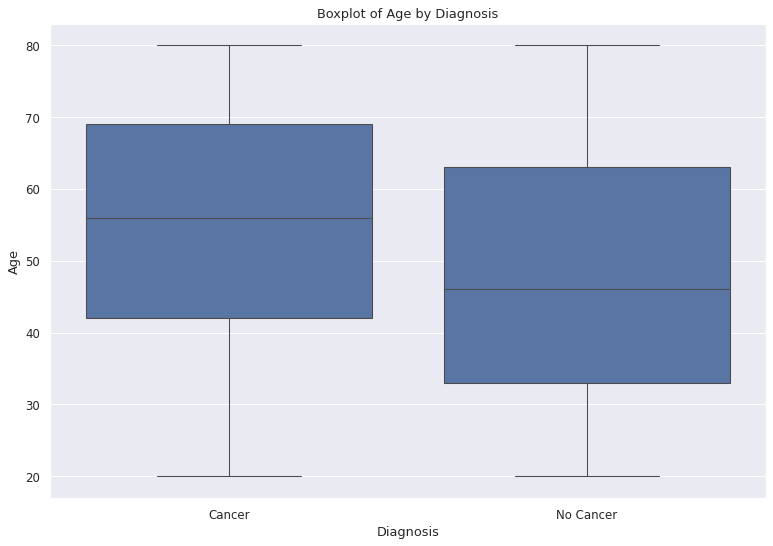

In [259]:
# Boxplot for Age by Diagnosis
# Represents IQR range of Age by Diagnosis

plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x='Diagnosis', y='Age', data=df_cat)
plt.title('Boxplot of Age by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

age_threshold:  40


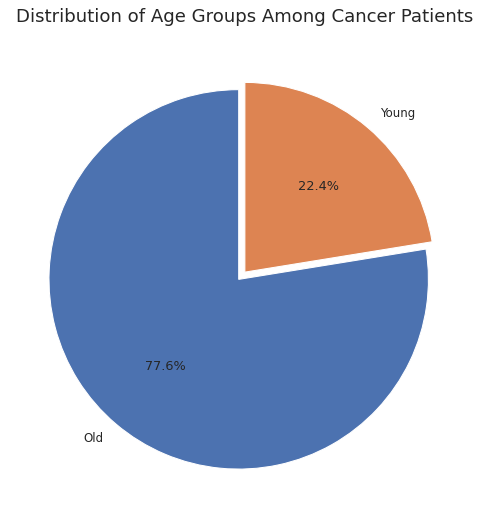

In [260]:
# Define a threshold for "young" vs "old" age
age_threshold = 40
print("age_threshold: ",age_threshold)
# Create a new column 'AgeGroup'
df_cat['AgeGroup'] = np.where(df_cat['Age'] < age_threshold, 'Young', 'Old')

# Filter the DataFrame for individuals with Diagnosis = 1 (Cancer)
cancer_patients = df_cat[df_cat['Diagnosis'] == 'Cancer']

# Count the number of young and old individuals with Cancer
age_group_counts = cancer_patients['AgeGroup'].value_counts()

# Create a pie chart
plt.figure(figsize=(12,8), dpi=77)
plt.pie(age_group_counts, labels=age_group_counts.index, explode = (0.05,0), autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Distribution of Age Groups Among Cancer Patients', size=17, pad=13)
plt.show()


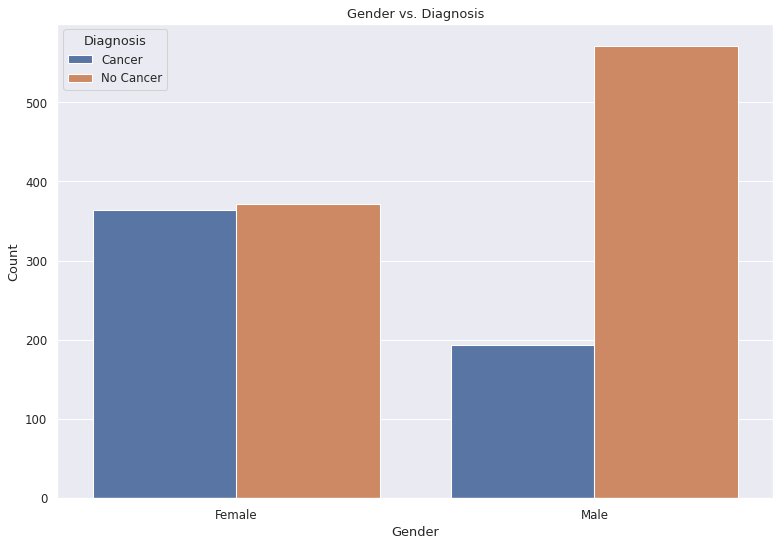

In [261]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x='Gender', hue='Diagnosis', data=df_cat)
plt.title('Gender vs. Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

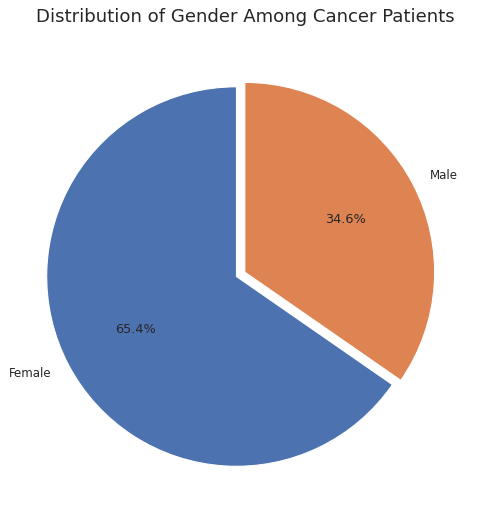

In [262]:
# Filter the DataFrame for individuals with Diagnosis = 1 (Cancer)
cancer_patients = df_cat[df_cat['Diagnosis'] == 'Cancer']

# Count the number of males and females with Cancer
gender_counts = cancer_patients['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(12,8), dpi=77)
plt.pie(gender_counts, labels=gender_counts.index, explode = (0.05,0), autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Distribution of Gender Among Cancer Patients', size=17, pad=13)
plt.show()

<Figure size 924x616 with 0 Axes>

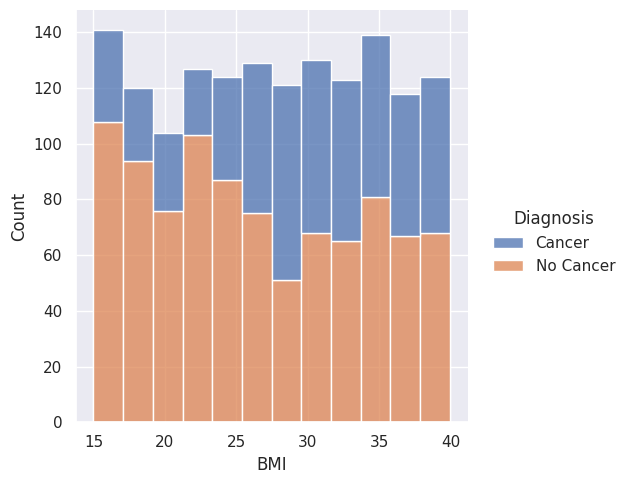

In [263]:
plt.figure(figsize=(12,8), dpi=77)
sns.displot(data=df_cat, x="BMI", hue="Diagnosis", multiple="stack")

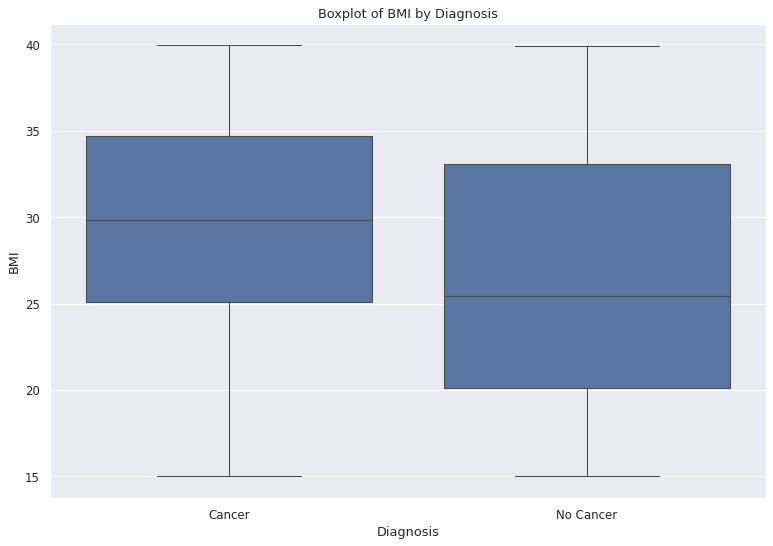

In [264]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x='Diagnosis', y='BMI', data=df_cat)
plt.title('Boxplot of BMI by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

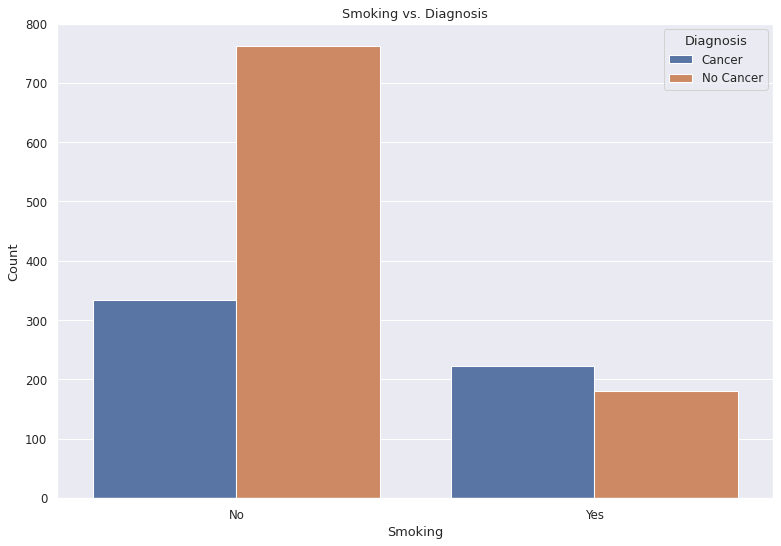

In [265]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x='Smoking', hue='Diagnosis', data=df_cat)
plt.title('Smoking vs. Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

<Figure size 924x616 with 0 Axes>

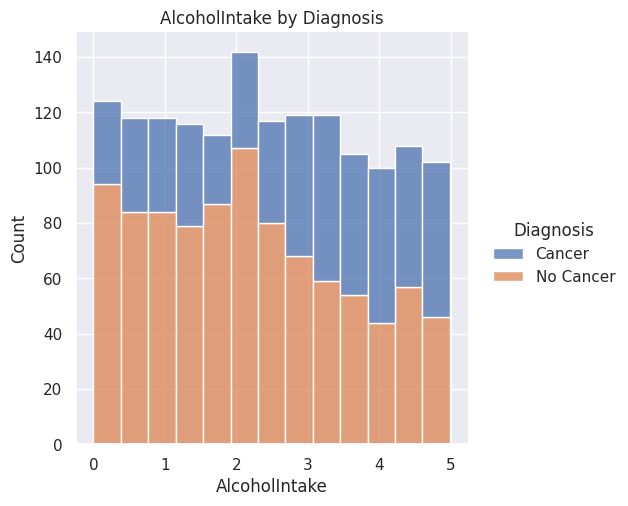

In [266]:
plt.figure(figsize=(12,8), dpi=77)
sns.displot(data=df_cat, x="AlcoholIntake", hue="Diagnosis", multiple="stack")
plt.title('AlcoholIntake by Diagnosis')
plt.show()

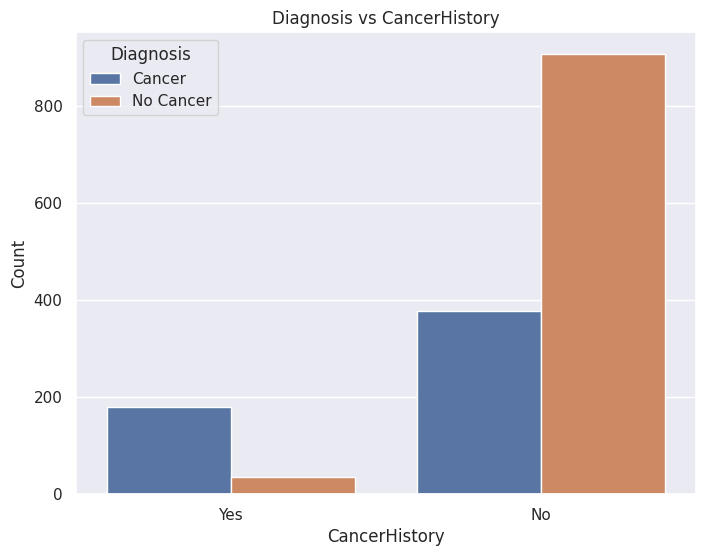

In [267]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CancerHistory', hue='Diagnosis', data=df_cat)
plt.title('Diagnosis vs CancerHistory')
plt.xlabel('CancerHistory')
plt.ylabel('Count')
plt.show()

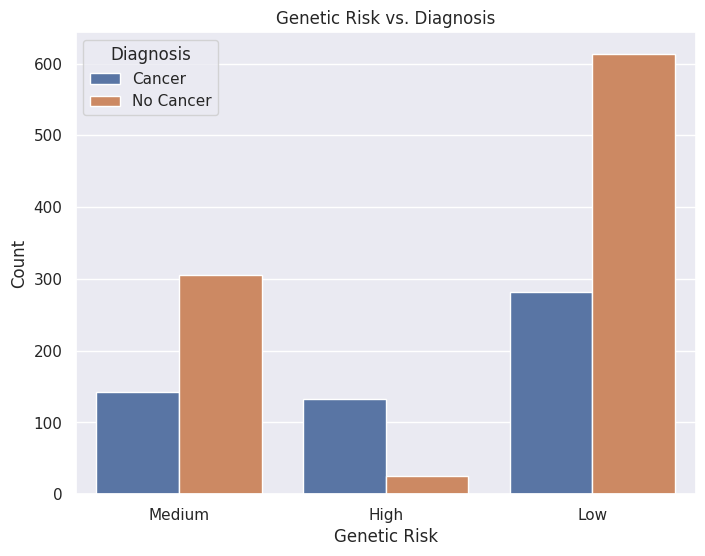

In [268]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GeneticRisk', hue='Diagnosis', data=df_cat)
plt.title('Genetic Risk vs. Diagnosis')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.show()

## Dataset Split

In [269]:
x=df_copy.drop('Diagnosis',axis=1)
y=df_copy['Diagnosis']

In [270]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
485    46       0  39.300133        0            2          0.090982   
527    41       1  36.764461        0            1          7.068036   
199    62       0  21.495330        0            1          7.974206   
889    54       1  23.509678        0            2          7.663041   
844    46       1  25.763233        0            2          9.300054   
...   ...     ...        ...      ...          ...               ...   
1130   41       0  17.787805        0            2          2.105285   
1294   24       0  37.960661        1            1          6.938633   
860    58       1  39.700899        0            1          8.514892   
1459   23       1  15.303919        0            1          3.269421   
1126   37       0  37.255375        1            0          0.968187   

      AlcoholIntake  CancerHistory  
485        0.546397              0  
527        1.249795              0  
199        3.708189     

## Model Comparison: Random Forest vs Logistic Regression
This section trains both models on the same train set and compares Accuracy, Precision, Recall, F1-score, and plots confusion matrices side by side.

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [272]:
# Fit models
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

lr = LogisticRegression()
lr.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
# Predictions
y_pred_rf = rf.predict(x_test)
y_pred_lr = lr.predict(x_test)

In [274]:
# Metrics table
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_lr)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_lr)],
    'F1-score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_lr)],
}).set_index('Model')

print("Classification metrics:")
display(results.round(4))


Classification metrics:


,Accuracy,Precision,Recall,F1-score
Model,,,,
Random Forest,0.9133,0.9069,0.9564,0.9310
Logistic Regression,0.8311,0.8220,0.9236,0.8699


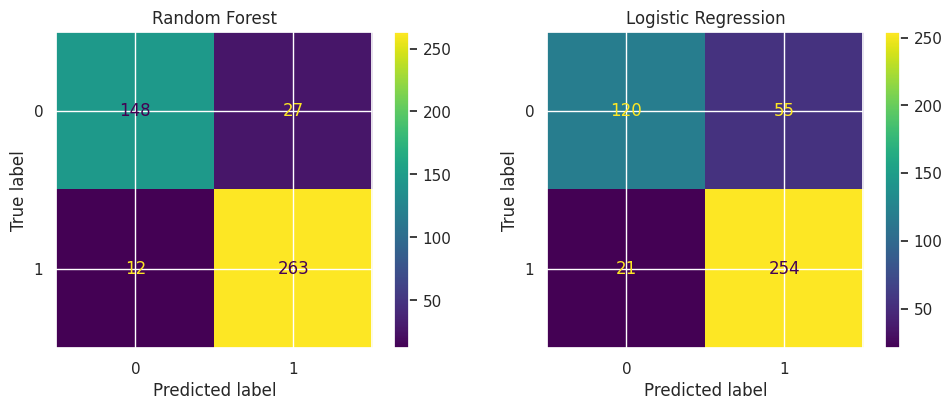

In [275]:
# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[0])
axes[0].set_title('Random Forest')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[1])
axes[1].set_title('Logistic Regression')
plt.tight_layout()
plt.show()

## Visual Comparison of Model Performance
Here we compare **Accuracy, Precision, Recall, and F1-score** of Random Forest and Logistic Regression using bar plots.

In [276]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [277]:
# Predictions from both models (assuming rf, lr, x_test, y_test already defined)
y_pred_rf = rf.predict(x_test)
y_pred_lr = lr.predict(x_test)


In [278]:
# Collect metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

results_df = pd.DataFrame({'Random Forest': rf_scores, 'Logistic Regression': lr_scores}, index=metrics)
print(results_df.round(4))


           Random Forest  Logistic Regression
Accuracy          0.9133               0.8311
Precision         0.9069               0.8220
Recall            0.9564               0.9236
F1-score          0.9310               0.8699


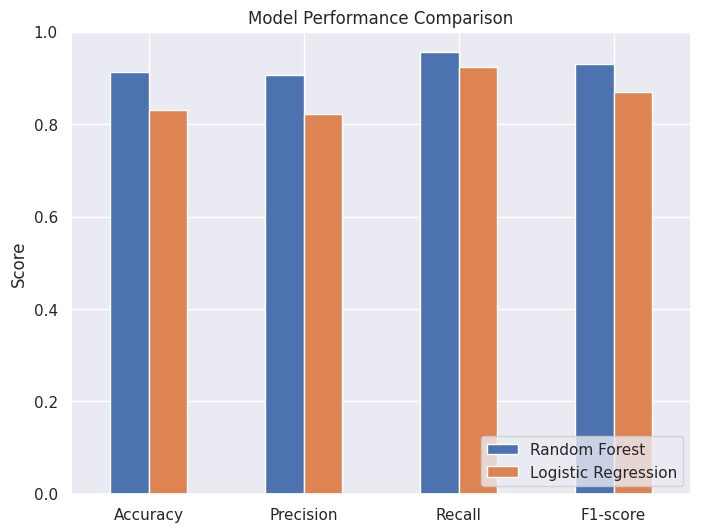

In [279]:
# Plot side-by-side bars
ax = results_df.plot(kind='bar', figsize=(8,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()